In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor         # SGD!
from sklearn.preprocessing import StandardScaler      # Z Score!
from sklearn.preprocessing import PolynomialFeatures  # Polinomios!
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

seed = 1

In [85]:
df_houses = pd.read_csv('king_ country_ houses_aa.csv')

In [86]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,48,-122,1800,7503


In [87]:
df_houses.info()

df_houses['date_convert'] = pd.to_datetime(df_houses['date'], format='%Y%m%dT%H%M%S')
df_houses['año_venta'] = df_houses['date_convert'].dt.year
df_houses['mes_venta'] = df_houses['date_convert'].dt.month

df_houses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_convert,año_venta,mes_venta
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,0,...,1955,0,98178,48,-122,1340,5650,2014-10-13,2014,10
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,0,...,1951,1991,98125,48,-122,1690,7639,2014-12-09,2014,12
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,0,...,1933,0,98028,48,-122,2720,8062,2015-02-25,2015,2
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,0,...,1965,0,98136,48,-122,1360,5000,2014-12-09,2014,12
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,0,...,1987,0,98074,48,-122,1800,7503,2015-02-18,2015,2


In [88]:
df_houses_drop = df_houses.drop(columns=['date','date_convert']) 
df_houses_drop.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,año_venta,mes_venta
0,7129300520,"221,900",3,1,1180,5650,1,0,0,3,...,0,1955,0,98178,48,-122,1340,5650,2014,10
1,6414100192,"538,000",3,2,2570,7242,2,0,0,3,...,400,1951,1991,98125,48,-122,1690,7639,2014,12
2,5631500400,"180,000",2,1,770,10000,1,0,0,3,...,0,1933,0,98028,48,-122,2720,8062,2015,2
3,2487200875,"604,000",4,3,1960,5000,1,0,0,5,...,910,1965,0,98136,48,-122,1360,5000,2014,12
4,1954400510,"510,000",3,2,1680,8080,1,0,0,3,...,0,1987,0,98074,48,-122,1800,7503,2015,2


In [89]:
df_houses.info()

df_houses['date_convert'] = pd.to_datetime(df_houses['date'], format='%Y%m%dT%H%M%S')
df_houses['año_venta'] = df_houses['date_convert'].dt.year
df_houses['mes_venta'] = df_houses['date_convert'].dt.month




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [90]:
# SEPARACIÓN DE FEATURES Y TARGET
# ================================


X = df_houses_drop.drop(columns=['price'])  # Assuming 'price' is the target column
y = df_houses_drop['price']  # Select the target column

print(f"Total de viviendas: {len(df_houses)}")
print(f"Features: {list(X.columns)}")

Total de viviendas: 21613
Features: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'año_venta', 'mes_venta']


In [91]:
print(f"Estadísticas del precio:")
pd.options.display.float_format = '{:,.0f}'.format
print(y.describe())

Estadísticas del precio:
count      21,613
mean      540,088
std       367,127
min        75,000
25%       321,950
50%       450,000
75%       645,000
max     7,700,000
Name: price, dtype: float64


In [92]:
# DIVISIÓN DE DATOS
# =================
# Dividimos en 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=seed
)

print(f"Datos de entrenamiento: {len(X_train)}")
print(f"Datos de prueba: {len(X_test)}")

Datos de entrenamiento: 17290
Datos de prueba: 4323


In [93]:

import os
# Set this environment variable before importing XGBoost
os.environ['OMP_NUM_THREADS'] = '1'

# Now import XGBoost and continue with your code
from xgboost import XGBRegressor
# ENTRENAMIENTO DEL MODELO
# =========================
# Creamos un modelo XGBoost para regresión
xgb_regressor = XGBRegressor(
    n_estimators=100,       # Número de árboles (boosting rounds = ligado a la tasa)
    learning_rate=0.1,     # Tasa de aprendizaje (lo que colabora cada árbol!!!)
    max_depth=6,            # Profundidad máxima de cada árbol
    subsample=0.8,          # Fracción de datos usados por cada árbol
    colsample_bytree=0.8,   # Fracción de features usadas por cada árbol
    reg_alpha=2,            # Regularización L1 (Lasso)
    reg_lambda=0,         # Regularización L2 (Ridge)
    random_state=seed,      # Reproducibilidad
    objective='reg:squarederror'  # Función objetivo para regresión
)

# Entrenamos el modelo con los datos de entrenamiento
xgb_regressor.fit(X_train, y_train)
print("Entrenado!")

Entrenado!


In [94]:
# PREDICCIÓN Y EVALUACIÓN
# =======================
# Hacemos predicciones sobre los datos de prueba
y_pred = xgb_regressor.predict(X_test)

# Calculamos las métricas de regresión
mse = mean_squared_error(y_test, y_pred)    # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)               # Coeficiente de Determinación R²

print(f"MSE (Error Cuadrático Medio):      {mse:.4f}")
print(f"RMSE (Raíz del MSE):               {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2*100:.2f}%")

MSE (Error Cuadrático Medio):      22644115590.1735
RMSE (Raíz del MSE):               150479.6185
R² (Coeficiente de Determinación): 86.88%


In [95]:
y_pred_train = xgb_regressor.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print(f"R² TEST:  {r2_test:.2%}")
print(f"R² TRAIN: {r2_train:.2%}")
print(f"Diferencia: {(r2_train - r2_test)*100:.2f} puntos porcentuales")

R² TEST:  86.88%
R² TRAIN: 95.63%
Diferencia: 8.75 puntos porcentuales


In [114]:
# EJEMPLO DE PREDICCIÓN INDIVIDUAL
# =================================
# Tomamos la primera vivienda del conjunto de prueba
single_data = X_test.iloc[9:10]
predicted_value = xgb_regressor.predict(single_data)

print(f"Valor predicho: ${predicted_value[0]}")
print(f"Valor real:     ${y_test.iloc[10]}")
print(f"Diferencia:     ${abs(predicted_value[0] - y_test.iloc[10])}")

Valor predicho: $757366.8125
Valor real:     $890000.0
Diferencia:     $132633.1875


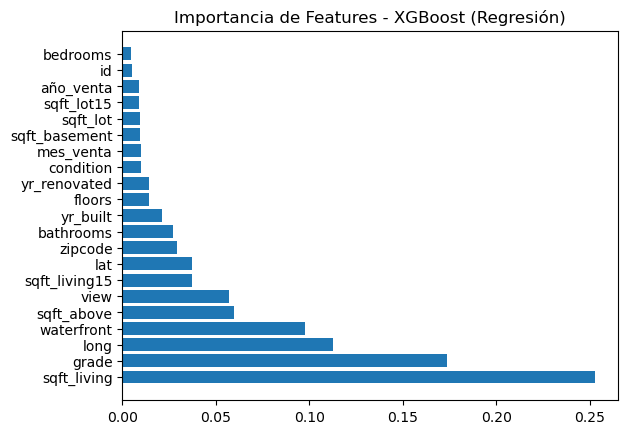

IMPORTANCIA DE CADA FEATURE
sqft_living         : 25.27%
grade               : 17.36%
long                : 11.26%
waterfront          : 9.77%
sqft_above          : 5.96%
view                : 5.68%
sqft_living15       : 3.74%
lat                 : 3.73%
zipcode             : 2.92%
bathrooms           : 2.69%
yr_built            : 2.11%
floors              : 1.44%
yr_renovated        : 1.41%
condition           : 1.01%
mes_venta           : 0.99%
sqft_basement       : 0.94%
sqft_lot            : 0.94%
sqft_lot15          : 0.92%
año_venta           : 0.89%
id                  : 0.52%
bedrooms            : 0.45%


In [111]:
#IMPORTANCIA DE FEATURES - REGRESIÓN
# ====================================
import matplotlib.pyplot as plt
import pandas as pd

# Obtenemos la importancia de cada feature
importance_df = pd.Series(xgb_regressor.feature_importances_,
                          index=X.columns).sort_values(ascending=False)

# Creamos el gráfico
# plt.gca().invert_yaxis()  = La más importante arriba
plt.barh(importance_df.index, importance_df.values)
plt.title('Importancia de Features - XGBoost (Regresión)')
plt.show()

# Mostramos los valores numéricos
print("IMPORTANCIA DE CADA FEATURE")
for feature, importance in importance_df.items():
    print(f"{feature:20s}: {importance*100:.2f}%")


In [116]:
df_houses_drop
df_high_houses = df_houses_drop[df_houses_drop["price"]>= 650000]
df_high_houses


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,año_venta,mes_venta
5,7237550310,"1,225,000",4,4,5420,101930,1,0,0,3,...,1530,2001,0,98053,48,-122,4760,101930,2014,5
10,1736800520,"662,500",3,2,3560,9796,1,0,0,3,...,1700,1965,0,98007,48,-122,2210,8925,2015,4
15,9297300055,"650,000",4,3,2950,5000,2,0,3,3,...,970,1979,0,98126,48,-122,2140,4000,2015,1
21,2524049179,"2,000,000",3,3,3050,44867,1,0,4,3,...,720,1968,0,98040,48,-122,4110,20336,2014,8
26,1794500383,"937,000",3,2,2450,2691,2,0,0,3,...,700,1915,0,98119,48,-122,1760,3573,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,"679,950",5,3,3600,9437,2,0,0,3,...,0,2014,0,98059,47,-122,3550,9421,2014,8
21597,191100405,"1,575,000",4,3,3410,10125,2,0,0,3,...,0,2007,0,98040,48,-122,2290,10125,2015,4
21599,7202300110,"810,000",4,3,3990,7838,2,0,0,3,...,0,2003,0,98053,48,-122,3370,6814,2014,9
21600,249000205,"1,537,000",5,4,4470,8088,2,0,0,3,...,0,2008,0,98004,48,-122,2780,8964,2014,10


In [118]:
# SEPARACIÓN DE FEATURES Y TARGET
# ================================


X = df_high_houses.drop(columns=['price'])  # Assuming 'price' is the target column
y = df_high_houses['price']  # Select the target column

print(f"Total de viviendas: {len(df_high_houses)}")
print(f"Features: {list(X.columns)}")

Total de viviendas: 5324
Features: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'año_venta', 'mes_venta']


In [119]:
print(f"Estadísticas del precio:")
pd.options.display.float_format = '{:,.0f}'.format
print(y.describe())

Estadísticas del precio:
count       5,324
mean      990,662
std       477,745
min       650,000
25%       725,000
50%       830,000
75%     1,050,000
max     7,700,000
Name: price, dtype: float64


In [101]:
# DIVISIÓN DE DATOS
# =================
# Dividimos en 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=seed
)

print(f"Datos de entrenamiento: {len(X_train)}")
print(f"Datos de prueba: {len(X_test)}")

Datos de entrenamiento: 4259
Datos de prueba: 1065


In [120]:
import os
# Set this environment variable before importing XGBoost
os.environ['OMP_NUM_THREADS'] = '1'

# Now import XGBoost and continue with your code
from xgboost import XGBRegressor
# ENTRENAMIENTO DEL MODELO
# =========================
# Creamos un modelo XGBoost para regresión
xgb_regressor_top_houses = XGBRegressor(
    n_estimators=300,       # Número de árboles (boosting rounds = ligado a la tasa)
    learning_rate=0.03,     # Tasa de aprendizaje (lo que colabora cada árbol!!!)
    max_depth=4,            # Profundidad máxima de cada árbol
    subsample=0.8,          # Fracción de datos usados por cada árbol
    colsample_bytree=0.8,   # Fracción de features usadas por cada árbol
    reg_alpha=0,            # Regularización L1 (Lasso)
    reg_lambda=10,           # Regularización L2 (Ridge)
    random_state=seed,      # Reproducibilidad
    objective='reg:squarederror'  # Función objetivo para regresión
)

# Entrenamos el modelo con los datos de entrenamiento
xgb_regressor_top_houses.fit(X_train, y_train)
print("Entrenado!")

Entrenado!


In [122]:
# PREDICCIÓN Y EVALUACIÓN
# =======================
# Hacemos predicciones sobre los datos de prueba
y_pred = xgb_regressor_top_houses.predict(X_test)

# Calculamos las métricas de regresión
mse = mean_squared_error(y_test, y_pred)    # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)               # Coeficiente de Determinación R²

print(f"MSE (Error Cuadrático Medio):      {mse:.4f}")
print(f"RMSE (Raíz del MSE):               {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2*100:.2f}%")

MSE (Error Cuadrático Medio):      34964995844.8687
RMSE (Raíz del MSE):               186989.2934
R² (Coeficiente de Determinación): 80.45%


In [123]:
y_pred_train = xgb_regressor_top_houses.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print(f"R² TEST:  {r2_test:.2%}")
print(f"R² TRAIN: {r2_train:.2%}")
print(f"Diferencia: {(r2_train - r2_test)*100:.2f} puntos porcentuales")

R² TEST:  80.45%
R² TRAIN: 88.68%
Diferencia: 8.22 puntos porcentuales


In [128]:
# EJEMPLO DE PREDICCIÓN INDIVIDUAL
# =================================
# Tomamos la primera vivienda del conjunto de prueba
single_data = X_test.iloc[27:28]
predicted_value = xgb_regressor_top_houses.predict(single_data)

print(f"Valor predicho: ${predicted_value[0]}")
print(f"Valor real:     ${y_test.iloc[28]}")
print(f"Diferencia:     ${abs(predicted_value[0] - y_test.iloc[28])}")

Valor predicho: $820570.9375
Valor real:     $1205000.0
Diferencia:     $384429.0625


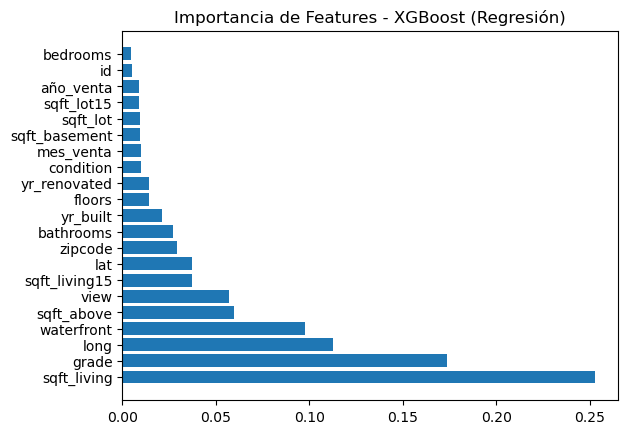

IMPORTANCIA DE CADA FEATURE
sqft_living         : 25.27%
grade               : 17.36%
long                : 11.26%
waterfront          : 9.77%
sqft_above          : 5.96%
view                : 5.68%
sqft_living15       : 3.74%
lat                 : 3.73%
zipcode             : 2.92%
bathrooms           : 2.69%
yr_built            : 2.11%
floors              : 1.44%
yr_renovated        : 1.41%
condition           : 1.01%
mes_venta           : 0.99%
sqft_basement       : 0.94%
sqft_lot            : 0.94%
sqft_lot15          : 0.92%
año_venta           : 0.89%
id                  : 0.52%
bedrooms            : 0.45%


In [125]:
#IMPORTANCIA DE FEATURES - REGRESIÓN
# ====================================
import matplotlib.pyplot as plt
import pandas as pd

# Obtenemos la importancia de cada feature
importance_df = pd.Series(xgb_regressor_top_houses.feature_importances_,
                          index=X.columns).sort_values(ascending=False)

# Creamos el gráfico
# plt.gca().invert_yaxis()  = La más importante arriba
plt.barh(importance_df.index, importance_df.values)
plt.title('Importancia de Features - XGBoost (Regresión)')
plt.show()

# Mostramos los valores numéricos
print("IMPORTANCIA DE CADA FEATURE")
for feature, importance in importance_df.items():
    print(f"{feature:20s}: {importance*100:.2f}%")
